<a href="https://colab.research.google.com/github/aqhareus/floorplan-stable-diffusion-AI54/blob/floorplan/4_ControlNet_Model_Testing_WANDB_COLORS_FIXED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ControlNet Floorplan Generator - Testing Notebook

**Test the trained model with upload/drawing before deploying!**

## What This Does:
- ✅ Load trained ControlNet model
- ✅ Test with dataset samples (check overfitting)
- ✅ Upload own segmentation masks
- ✅ Draw custom layouts interactively
- ✅ Generate variations & explore parameters
- ✅ Save results for report

## Setup Instructions:
1. **Runtime → Change runtime type → T4 GPU**
2. Run cells in order from top to bottom
3. Wait for model loading (~2-3 minutes)
4. Start testing!

---

## Step 1: Install Dependencies

In [2]:
# === INSTALLATION - FIXED FOR COMPATIBILITY ===
# This fixes the 'cached_download' import error

import sys
print(f"Python version: {sys.version}\n")

# Clean install to avoid conflicts
print("Cleaning old packages...")
!pip uninstall -y diffusers transformers accelerate huggingface_hub -q

# Install latest compatible versions
print("Installing compatible packages...")
!pip install -q diffusers>=0.27.0
!pip install -q transformers>=4.40.0
!pip install -q accelerate>=0.27.0
!pip install -q huggingface_hub>=0.20.0
!pip install -q gradio>=4.20.0
!pip install -q datasets

# Verify installation
print("\nVerifying installation...")
import torch
try:
    from diffusers import StableDiffusionControlNetPipeline, ControlNetModel
    from transformers import __version__ as trans_ver
    from diffusers import __version__ as diff_ver
    print(f"Diffusers: {diff_ver}")
    print(f"Transformers: {trans_ver}")
    print(f"PyTorch: {torch.__version__}")
    print(f"CUDA available: {torch.cuda.is_available()}")
    if torch.cuda.is_available():
        print(f"GPU: {torch.cuda.get_device_name(0)}")
    print("\nInstallation complete!")
except Exception as e:
    print(f"❌ Error: {e}")
    print("\nIf you see an error, click Runtime → Restart runtime, then re-run this cell.")


Python version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]

Cleaning old packages...
Installing compatible packages...
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 5.2.0 requires transformers<6.0.0,>=4.41.0, which is not installed.
peft 0.18.0 requires accelerate>=0.21.0, which is not installed.
peft 0.18.0 requires transformers, which is not installed.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
peft 0.18.0 requires accelerate>=0.21.0, which is not installed.

Verifying installation...


Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.


Diffusers: 0.36.0
Transformers: 4.57.3
PyTorch: 2.9.0+cu126
CUDA available: True
GPU: Tesla T4

Installation complete! You can proceed.


## Step 2: Load Your Trained Model

In [3]:
import torch
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset
import gradio as gr
import random

print("Loading your trained ControlNet model...")
print("This takes 2-3 minutes on first load")

# Load your trained ControlNet
controlnet = ControlNetModel.from_pretrained(
    "aqhareus/controlnet-floorplan-final",
    torch_dtype=torch.float16
)

# Load Stable Diffusion pipeline
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "stable-diffusion-v1-5/stable-diffusion-v1-5",
    controlnet=controlnet,
    torch_dtype=torch.float16,
    safety_checker=None
)

# Move to GPU and optimize memory
device = "cuda" if torch.cuda.is_available() else "cpu"
pipe = pipe.to(device)
pipe.enable_model_cpu_offload()
pipe.enable_attention_slicing()

print(f"\nModel loaded successfully on {device}!")
print(f"Memory optimizations enabled")

Loading your trained ControlNet model...
This takes 2-3 minutes on first load


config.json: 0.00B [00:00, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!
You have disabled the safety checker for <class 'diffusers.pipelines.controlnet.pipeline_controlnet.StableDiffusionControlNetPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .



Model loaded successfully on cuda!
Memory optimizations enabled


## Step 3: Define Room Colors & Generation Function

In [4]:
# Room color palette (matching your dataset)
# Room color palette - CORRECTED TO MATCH ACTUAL DATASET
# These are the exact RGB values your model was trained on!
# Room color palette - UPDATED from dataset analysis
ROOM_COLORS = {
    "Living Room": (154, 255, 0),      # Lime/Yellow-Green
    "Bedroom": (254, 154, 0),          # Orange
    "Kitchen": (154, 255, 0),          # Lime/Yellow-Green (same as Living Room)
    "Bathroom": (0, 155, 255),         # Cyan/Light Blue
    "Closet": (99, 80, 71),            # Brown/Gray
    "Corridor": (49, 99, 155),         # Dark Blue
    "Toilet": (0, 0, 0),               # Black
}

print("Room Color Palette:")
for room, color in ROOM_COLORS.items():
    print(f"   {room:15s} → RGB{color}")

def generate_floorplan(
    segmentation_mask,
    prompt="a clean architectural floorplan with walls and rooms",
    num_inference_steps=20,
    controlnet_conditioning_scale=1.0,
    seed=42,
    show_comparison=True
):
    """
    Generate a floorplan from a segmentation mask.

    Args:
        segmentation_mask: PIL Image or numpy array (RGB)
        prompt: Text description
        num_inference_steps: Quality (10-50, higher=better/slower)
        controlnet_conditioning_scale: Layout strictness (0.5-2.0)
        seed: Random seed for reproducibility
        show_comparison: Display input vs output

    Returns:
        Generated PIL Image
    """
    # Prepare image
    if isinstance(segmentation_mask, np.ndarray):
        segmentation_mask = Image.fromarray(segmentation_mask)

    segmentation_mask = segmentation_mask.convert("RGB").resize((512, 512), Image.LANCZOS)

    # Generate
    generator = torch.Generator(device=device).manual_seed(seed)

    output = pipe(
        prompt=prompt,
        image=segmentation_mask,
        num_inference_steps=num_inference_steps,
        controlnet_conditioning_scale=controlnet_conditioning_scale,
        generator=generator,
        guidance_scale=7.5
    )

    generated = output.images[0]

    # Display comparison
    if show_comparison:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        axes[0].imshow(segmentation_mask)
        axes[0].set_title("Input Segmentation", fontsize=14, fontweight='bold')
        axes[0].axis('off')

        axes[1].imshow(generated)
        axes[1].set_title("Generated Floorplan", fontsize=14, fontweight='bold')
        axes[1].axis('off')

        plt.tight_layout()
        plt.show()

    return generated

print("\nGeneration function ready!")

Room Color Palette:
   Living Room     → RGB(154, 255, 0)
   Bedroom         → RGB(254, 154, 0)
   Kitchen         → RGB(154, 255, 0)
   Bathroom        → RGB(0, 155, 255)
   Closet          → RGB(99, 80, 71)
   Corridor        → RGB(49, 99, 155)
   Toilet          → RGB(0, 0, 0)

Generation function ready!


## Step 4: Test with Dataset Samples (Overfitting Check)

**This tests if your model is overfitting by comparing:**
- Input segmentation
- Generated floorplan (your model)
- Ground truth (training data)

**What to look for:**
- ✅ Generated matches input layout structure
- ✅ Generated is NOT identical to ground truth (overfitting sign)
- ✅ Generated has realistic architectural details

Loading test samples from dataset...


train/data-00000-of-00005.arrow:   0%|          | 0.00/460M [00:00<?, ?B/s]

train/data-00001-of-00005.arrow:   0%|          | 0.00/461M [00:00<?, ?B/s]

train/data-00002-of-00005.arrow:   0%|          | 0.00/460M [00:00<?, ?B/s]

train/data-00003-of-00005.arrow:   0%|          | 0.00/460M [00:00<?, ?B/s]

train/data-00004-of-00005.arrow:   0%|          | 0.00/459M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/7394 [00:00<?, ? examples/s]

Testing samples: [5368, 6889, 6505]

Sample 1/3 (Dataset index: 5368)
Caption: a floor plan drawing, the rooms are used for the living room, dining room, kitchen, bedroom and bathroom,the furniture types are the chairs, the table, the sofa, the bed, the wardrobe, the wardrobe, the bed, the wardrobe, the bed, the wardrobe, the bed, the wardrobe, the bed, the wardrobe, the bed, the,


  0%|          | 0/20 [00:00<?, ?it/s]

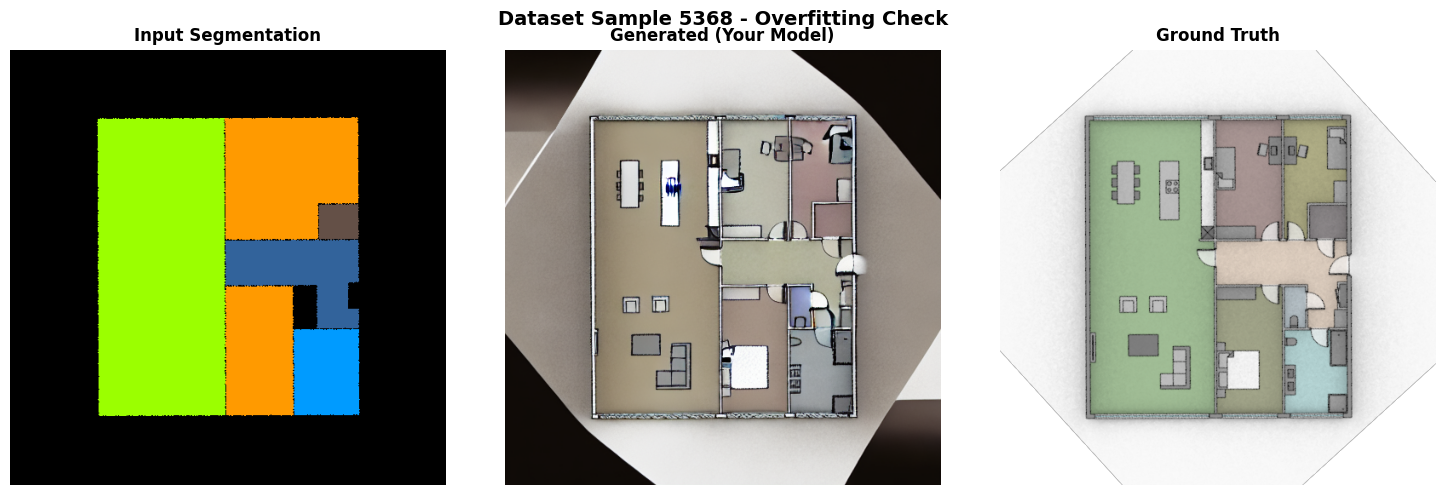


Evaluation Questions:
 Does generated match input layout?
 Is generated TOO similar to ground truth? (overfitting)
 Are walls/rooms in correct positions?

Sample 2/3 (Dataset index: 6889)
Caption: a floor plan drawing, the rooms are used for the living room, kitchen, bedroom and bathroom,the furniture types are the chairs, the table, the sofa, the bed, the wardrobe, the wardrobe, the bed, the wardrobe, the bed, the wardrobe, the bed, the wardrobe, the bed, the wardrobe, the bed, the,


  0%|          | 0/20 [00:00<?, ?it/s]

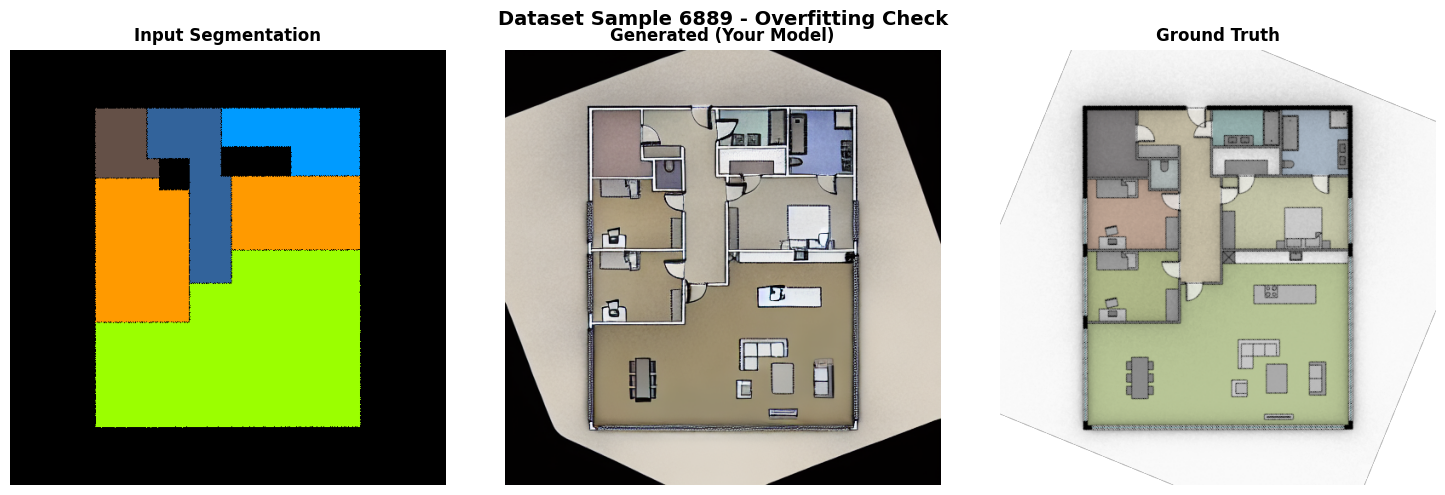


Evaluation Questions:
 Does generated match input layout?
 Is generated TOO similar to ground truth? (overfitting)
 Are walls/rooms in correct positions?

Sample 3/3 (Dataset index: 6505)
Caption: a floor plan drawing, the rooms are used for the living room, kitchen, bedroom, bathroom, and office,the furniture types are the chairs, the table, the sofa, the bed, the wardrobe, the wardrobe, the bed, the wardrobe, the bed, the wardrobe, the bed, the wardrobe, the bed, the wardrobe, the bed, the,


  0%|          | 0/20 [00:00<?, ?it/s]

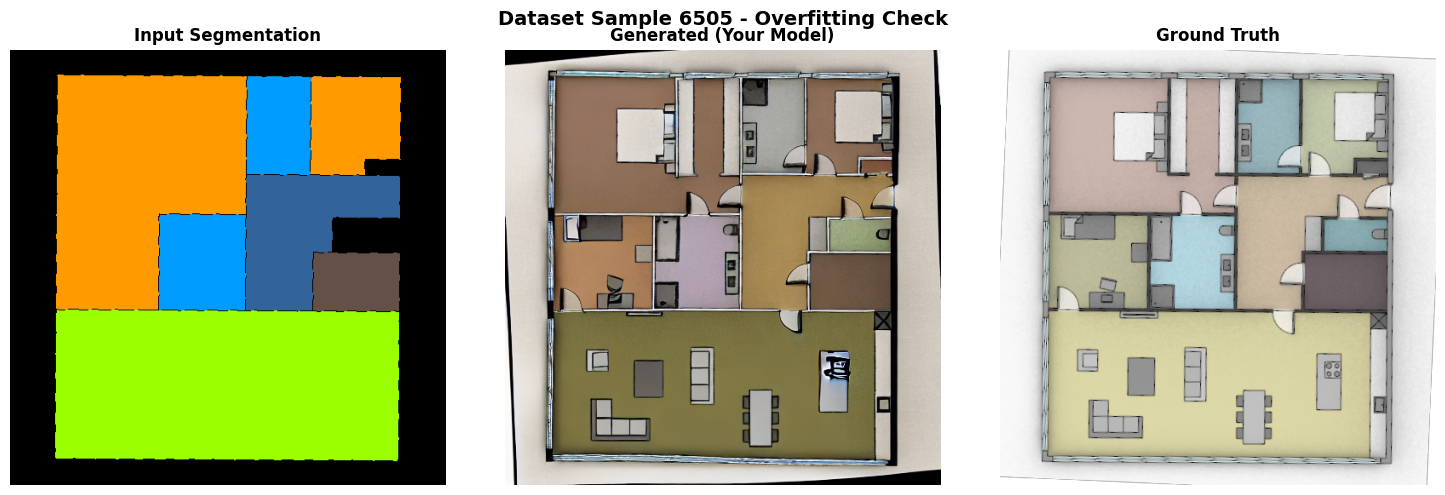


Evaluation Questions:
 Does generated match input layout?
 Is generated TOO similar to ground truth? (overfitting)
 Are walls/rooms in correct positions?


✅ Dataset testing complete!


In [5]:
# Load dataset
print("Loading test samples from dataset...")
dataset = load_dataset("Qistinasofea/floorplan-aligned-strict", split="train")

# Test 3 random samples
test_indices = random.sample(range(len(dataset)), 3)
print(f"Testing samples: {test_indices}\n")

for i, idx in enumerate(test_indices):
    sample = dataset[idx]

    print(f"{'='*70}")
    print(f"Sample {i+1}/3 (Dataset index: {idx})")
    print(f"Caption: {sample['captions']}")
    print(f"{'='*70}")

    # Generate
    generated = generate_floorplan(
        segmentation_mask=sample['colors'],
        prompt=sample['captions'],
        seed=42,
        show_comparison=False
    )

    # Display: Input → Generated → Ground Truth
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    axes[0].imshow(sample['colors'])
    axes[0].set_title("Input Segmentation", fontsize=12, fontweight='bold')
    axes[0].axis('off')

    axes[1].imshow(generated)
    axes[1].set_title("Generated (Your Model)", fontsize=12, fontweight='bold')
    axes[1].axis('off')

    axes[2].imshow(sample['plans'])
    axes[2].set_title("Ground Truth", fontsize=12, fontweight='bold')
    axes[2].axis('off')

    plt.suptitle(f"Dataset Sample {idx} - Overfitting Check", fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

    print("\nEvaluation Questions:")
    print(" Does generated match input layout?")
    print(" Is generated TOO similar to ground truth? (overfitting)")
    print(" Are walls/rooms in correct positions?\n")

print("\n✅ Dataset testing complete!")

## Step 5: Create Custom Layouts Programmatically

Test 1: Simple 2-Bedroom Apartment (PERFECT - No Borders)


/tmp/ipython-input-1356556218.py:21: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  return Image.fromarray(img_array, 'RGB')


  0%|          | 0/20 [00:00<?, ?it/s]

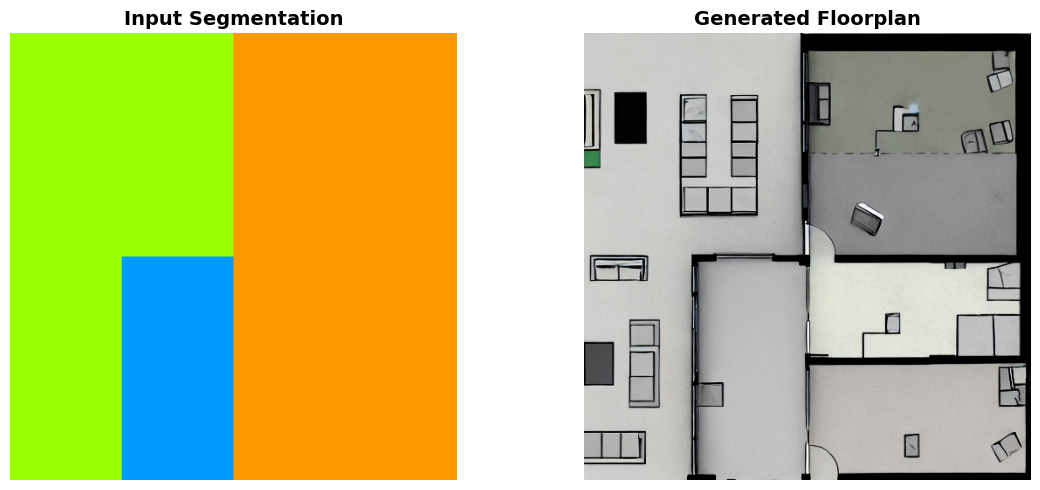


Test 2: Studio Apartment


  0%|          | 0/20 [00:00<?, ?it/s]

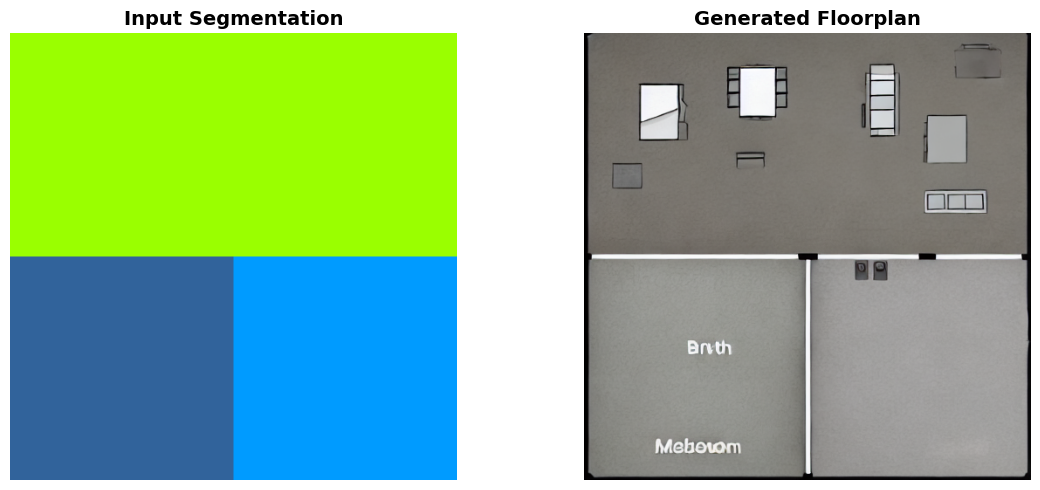


Test 3: Complex Multi-Room House


  0%|          | 0/20 [00:00<?, ?it/s]

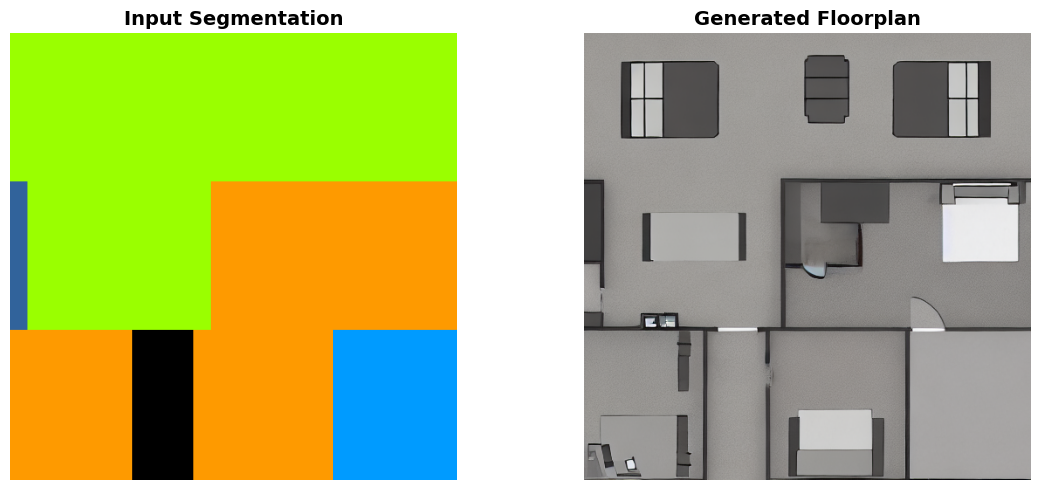


✅ Custom layouts tested - ZERO borders!
✅ Using numpy for pixel-perfect control


In [6]:
def create_simple_layout(rooms_config, size=512):
    """
    Create segmentation mask with ABSOLUTELY NO BORDERS.

    Uses numpy array manipulation for pixel-perfect control.
    PIL's draw.rectangle() has anti-aliasing artifacts - this doesn't!
    """
    import numpy as np

    # Create black background as numpy array
    img_array = np.zeros((size, size, 3), dtype=np.uint8)

    # Fill rooms by directly setting pixel values (NO BORDERS!)
    for room_name, x, y, w, h in rooms_config:
        color = ROOM_COLORS.get(room_name, (128, 128, 128))

        # Direct pixel assignment - perfect fills, zero borders
        img_array[y:y+h, x:x+w] = color

    # Convert to PIL Image
    return Image.fromarray(img_array, 'RGB')


# Test Layout 1: Simple 2-Bedroom Apartment
print("Test 1: Simple 2-Bedroom Apartment (PERFECT - No Borders)")
layout1 = create_simple_layout([
    ("Living Room", 0, 0, 256, 256),      # Top-left
    ("Bedroom", 256, 0, 256, 256),        # Top-right (starts at 256!)
    ("Living Room", 0, 256, 128, 256),    # Bottom-left
    ("Bathroom", 128, 256, 128, 256),     # Bottom-middle (starts at 128!)
    ("Bedroom", 256, 256, 256, 256)       # Bottom-right (starts at 256!)
])
generated1 = generate_floorplan(layout1, seed=457)

# Test Layout 2: Studio Apartment
print("\nTest 2: Studio Apartment")
layout2 = create_simple_layout([
    ("Living Room", 0, 0, 512, 256),      # Full width top
    ("Corridor", 0, 256, 256, 256),        # Left half
    ("Bathroom", 256, 256, 256, 256)      # Right half (starts at 256!)
])
generated2 = generate_floorplan(layout2, seed=412)

# Test Layout 3: Complex Multi-Room House
print("\nTest 3: Complex Multi-Room House")
layout3 = create_simple_layout([
    # Row 1: Living Room (230px) + Kitchen (282px) = 512px ✓
    ("Living Room", 0, 0, 230, 170),
    ("Kitchen", 230, 0, 282, 170),

    # Row 2: Corridor (20px) + Kitchen (210px) + Bedroom (282px) = 512px ✓
    ("Corridor", 0, 170, 20, 170),
    ("Kitchen", 20, 170, 210, 170),
    ("Bedroom", 230, 170, 282, 170),

    # Row 3: Bedroom (140px) + Toilet (70px) + Bedroom (160px) + Bathroom (142px) = 512px ✓
    ("Bedroom", 0, 340, 140, 172),
    ("Toilet", 140, 340, 70, 172),
    ("Bedroom", 210, 340, 160, 172),
    ("Bathroom", 370, 340, 142, 172)
])
generated3 = generate_floorplan(layout3, seed=212)

print("\n✅ Custom layouts tested - ZERO borders!")
print("✅ Using numpy for pixel-perfect control")


## Step 6: Test Diversity (Multiple Seeds)

**Check if the model generates diverse outputs or just memorized patterns**

/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice:

 2


wandb: You chose 'Use an existing W&B account'
wandb: Logging into https://api.wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: Find your API key here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: sofea-utbm (sofeasuhaimi-utbm) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


wandb: Detected [huggingface_hub.inference, mcp] in use.
wandb: Use W&B Weave for improved LLM call tracing. Install Weave with `pip install weave` then add `import weave` to the top of your script.
wandb: For more information, check out the docs at: https://weave-docs.wandb.ai/


Generating 4 variations with different seeds...



  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

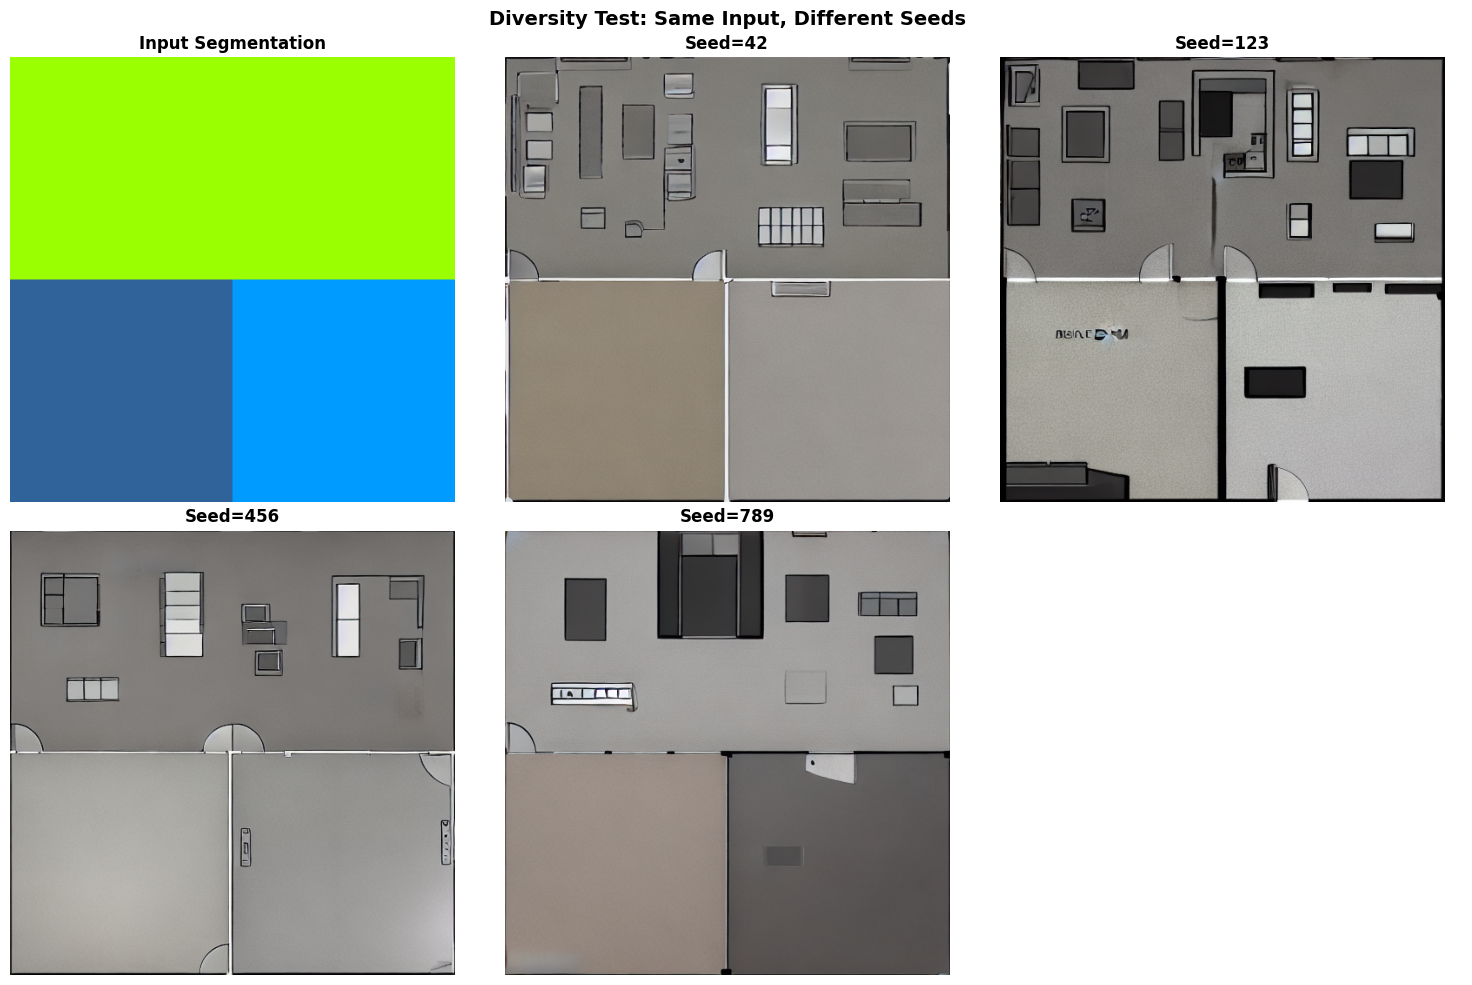


Evaluation:
 Good: Outputs show variation (different details, styles)
 Bad: All outputs nearly identical (overfitting sign)


In [7]:
import wandb
import matplotlib.pyplot as plt

# ---- W&B init ----
wandb.init(
    project="AI54-Floorplan",      # change
    name="diversity_test_seeds_layout_latest", # change
    config={
        "layout": "layout2",
        "seeds": [42, 123, 456, 789],
    }
)

print("Generating 4 variations with different seeds...\n")

test_layout = layout2  # Use studio apartment
seeds = [42, 123, 456, 789]

# Log the input segmentation once
wandb.log({"input_segmentation": wandb.Image(test_layout, caption="Input Segmentation")})

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Show input
axes[0].imshow(test_layout)
axes[0].set_title("Input Segmentation", fontsize=12, fontweight="bold")
axes[0].axis("off")

# Generate variations + log to W&B
for i, seed in enumerate(seeds):
    generated = generate_floorplan(
        segmentation_mask=test_layout,
        seed=seed,
        show_comparison=False
    )

    # Show in the grid
    axes[i + 1].imshow(generated)
    axes[i + 1].set_title(f"Seed={seed}", fontsize=12, fontweight="bold")
    axes[i + 1].axis("off")

    # Log each generated image to W&B
    wandb.log({
        "seed": seed,  # useful for filtering
        f"generated/seed_{seed}": wandb.Image(generated, caption=f"Generated (seed={seed})")
    })

    # (Optional) Log side-by-side comparison (input + output) as a single image
    panel_fig, panel_ax = plt.subplots(1, 2, figsize=(8, 4))
    panel_ax[0].imshow(test_layout)
    panel_ax[0].set_title("Input")
    panel_ax[0].axis("off")
    panel_ax[1].imshow(generated)
    panel_ax[1].set_title(f"Output (seed={seed})")
    panel_ax[1].axis("off")
    plt.tight_layout()

    wandb.log({f"comparison/seed_{seed}": wandb.Image(panel_fig)})
    plt.close(panel_fig)

# Hide last subplot
axes[5].axis("off")

plt.suptitle("Diversity Test: Same Input, Different Seeds", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

print("\nEvaluation:")
print(" Good: Outputs show variation (different details, styles)")
print(" Bad: All outputs nearly identical (overfitting sign)")

wandb.finish()


## Step 7: Explore Conditioning Scale

**Test how strictly the model follows your input layout**

Testing conditioning scale (layout strictness)...



  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

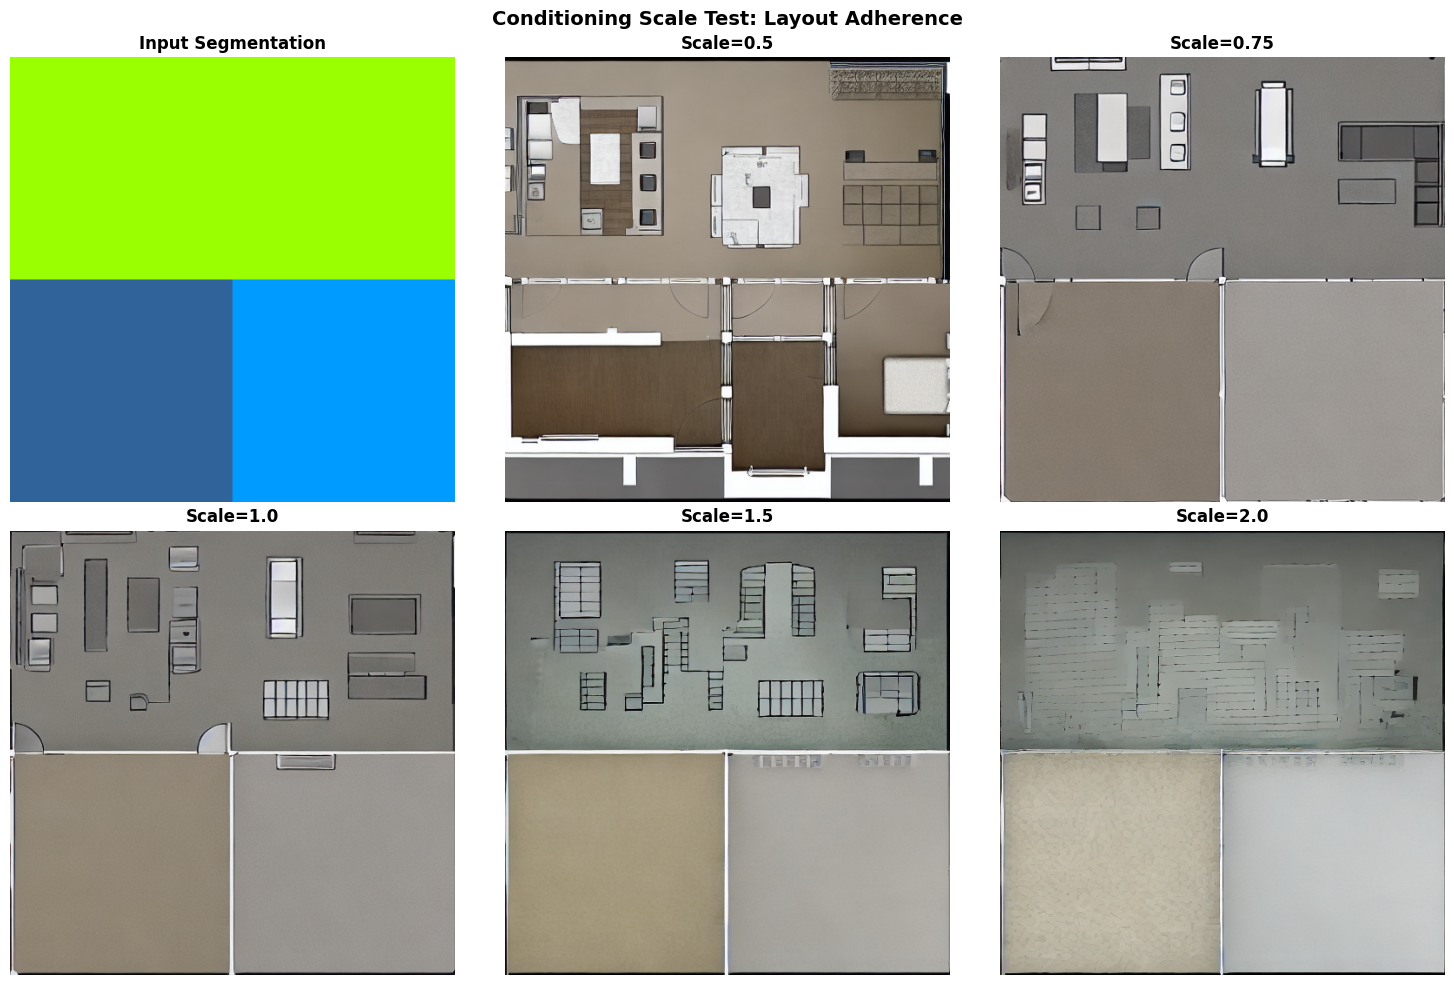


Expected Behavior:
   • Scale 0.5: More creative freedom, looser layout
   • Scale 1.0: Balanced (default)
   • Scale 2.0: Stricter layout adherence


In [8]:
import wandb
import matplotlib.pyplot as plt

# If not logged in yet:
# wandb.login()

# ---- W&B init ----
wandb.init(
    project="AI54-Floorplan",          # change if needed
    name="conditioning_scale_test_layout2",  # change if needed
    config={
        "layout": "layout2",
        "conditioning_scales": [0.5, 0.75, 1.0, 1.5, 2.0],
        "seed": 42
    }
)

print("Testing conditioning scale (layout strictness)...\n")

scales = [0.5, 0.75, 1.0, 1.5, 2.0]
test_layout = layout2

# Log input once
wandb.log({
    "input_segmentation": wandb.Image(
        test_layout, caption="Input Segmentation"
    )
})

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Show input
axes[0].imshow(test_layout)
axes[0].set_title("Input Segmentation", fontsize=12, fontweight="bold")
axes[0].axis("off")

# Test different conditioning scales
for i, scale in enumerate(scales):
    generated = generate_floorplan(
        segmentation_mask=test_layout,
        controlnet_conditioning_scale=scale,
        seed=42,
        show_comparison=False
    )

    # Display in grid
    axes[i + 1].imshow(generated)
    axes[i + 1].set_title(f"Scale={scale}", fontsize=12, fontweight="bold")
    axes[i + 1].axis("off")

    # Log generated image
    wandb.log({
        "conditioning_scale": scale,
        f"generated/scale_{scale}": wandb.Image(
            generated, caption=f"Scale={scale}"
        )
    })

    # Optional: log input vs output comparison
    panel_fig, panel_ax = plt.subplots(1, 2, figsize=(8, 4))
    panel_ax[0].imshow(test_layout)
    panel_ax[0].set_title("Input")
    panel_ax[0].axis("off")
    panel_ax[1].imshow(generated)
    panel_ax[1].set_title(f"Output (scale={scale})")
    panel_ax[1].axis("off")
    plt.tight_layout()

    wandb.log({
        f"comparison/scale_{scale}": wandb.Image(panel_fig)
    })
    plt.close(panel_fig)

# Hide unused subplot
axes[5].axis("off")

plt.suptitle(
    "Conditioning Scale Test: Layout Adherence",
    fontsize=14,
    fontweight="bold"
)
plt.tight_layout()
plt.show()

print("\nExpected Behavior:")
print("   • Scale 0.5: More creative freedom, looser layout")
print("   • Scale 1.0: Balanced (default)")
print("   • Scale 2.0: Stricter layout adherence")

wandb.finish()


## Step 8: Interactive Drawing Interface (GRADIO)

**Upload own images OR draw layouts interactively!**

This launches a web interface that can:
- Draw colored room layouts with a brush
- Upload segmentation mask images
- Adjust generation parameters
- Get instant results

In [11]:
def gradio_generate(image_dict, prompt, steps, scale, seed):
    """Fixed Gradio wrapper with proper type conversion."""
    if image_dict is None:
        return None

    try:
        # Extract image
        if isinstance(image_dict, dict) and 'composite' in image_dict:
            img = image_dict['composite']
        else:
            img = image_dict

        # FIX: Convert parameters to correct types
        steps = int(steps)
        scale = float(scale)
        seed = int(seed)

        # Generate
        result = generate_floorplan(
            segmentation_mask=img,
            prompt=str(prompt),
            num_inference_steps=steps,
            controlnet_conditioning_scale=scale,
            seed=seed,
            show_comparison=False
        )

        return result

    except Exception as e:
        print(f"Error: {e}")
        import traceback
        traceback.print_exc()
        return None



In [15]:
#Now re-launch the Gradio interface with the fixed function
import gradio as gr

with gr.Blocks(title="ControlNet Floorplan Tester") as demo:
    gr.Markdown("""ControlNet Floorplan Generator - Interactive Testing
Draw or upload your layouts.
Draw: Use colored brush to draw room layouts
Upload: Upload an image (PNG/JPG)
Generate: Click button and wait ~10-15 seconds""")

    with gr.Row():
        with gr.Column():
            input_image = gr.ImageEditor(
                label="Draw or Upload Segmentation Mask",
                type="pil",
                brush=gr.Brush(
                    colors=[
                        "#9AFF00",  # Living Room (Lime)
                        "#FE9A00",  # Bedroom (Orange)
                        "#9AFF00",  # Kitchen (Lime - same as Living Room)
                        "#009BFF",  # Bathroom (Cyan)
                        "#635047",  # Closet (Brown)
                        "#31639B",  # Corridor (Dark Blue)
                        "#000000"   # Toilet (Black)
                    ],
                    default_size=30
                ),
                height=512
            )

            prompt = gr.Textbox(
                label="Prompt",
                value="a clean architectural floorplan with walls and rooms"
            )

            with gr.Row():
                steps = gr.Slider(10, 50, 20, step=1, label="Steps")
                scale = gr.Slider(0.5, 2.0, 1.0, step=0.1, label="Scale")

            seed = gr.Slider(0, 999999, 42, step=1, label="Seed")
            generate_btn = gr.Button("🚀 Generate Floorplan", variant="primary", size="lg")

        with gr.Column():
            output_image = gr.Image(label="Generated Floorplan", type="pil")

    gr.Markdown("""
    ### 🎨 Color Legend:

🟢 Lime: Living Room
🟠 Orange: Bedroom
🟢 Lime: Kitchen
🔵 Cyan: Bathroom
🟤 Brown: Closet
🔷 Dark Blue: Corridor
⬛ Black: Toilet

    ### 💡 Tips:

Draw clear rectangular regions
Use larger brush for bigger rooms
Try different seeds for variations
Higher scale = stricter layout adherence
""")

    generate_btn.click(
        fn=gradio_generate,
        inputs=[input_image, prompt, steps, scale, seed],
        outputs=output_image
    )

demo.launch(share=True, debug=True)

print("\nInterface launched!")
print("Use the public URL to test on phone or share with others")
print("Upload images OR draw directly on the canvas")
print("Right-click generated images to save them")

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://bc5459359079af7cc3.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


  0%|          | 0/30 [00:00<?, ?it/s]

Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://bc5459359079af7cc3.gradio.live

Interface launched!
Use the public URL to test on your phone or share with others
Upload images OR draw directly on the canvas
Right-click generated images to save them


##  Step 9: Save Results for Report (Optional)

Generate a comprehensive comparison grid for your AI54 report Section 5.2

Generating report-ready comparison grid...

Generating seed variations...


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Generating scale variations...


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

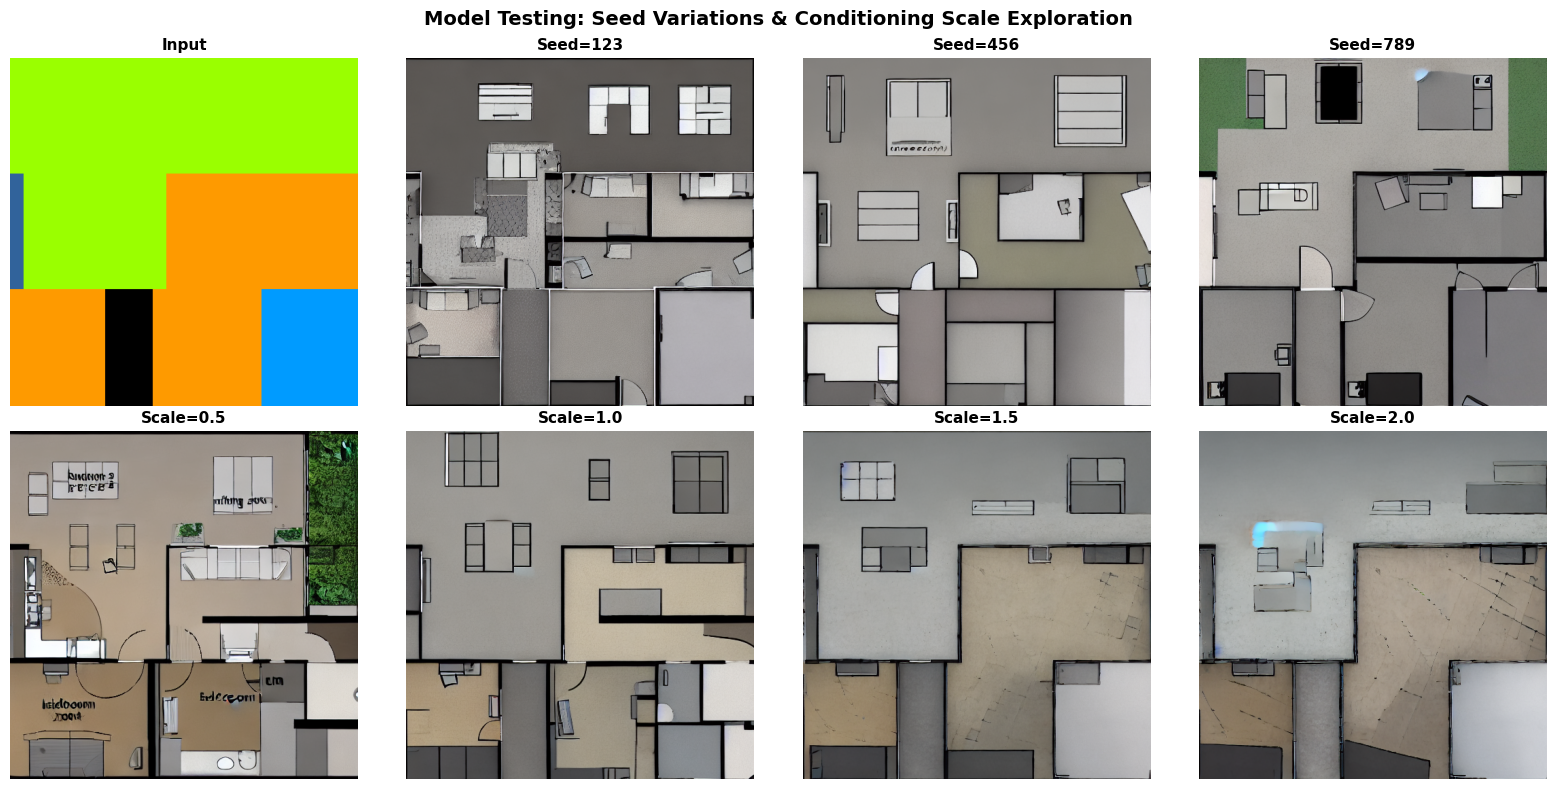


✅ Saved to: ai54_section_5_2_comparison_grid.png
📄 Use this image in your report Section 5.2!
💾 Download it from Colab Files panel (left sidebar)


In [16]:
import matplotlib.pyplot as plt
import numpy as np

print("Generating report-ready comparison grid...\n")

fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Row 1: Different seeds
print("Generating seed variations...")
seeds = [42, 123, 456, 789]
for i, seed in enumerate(seeds):
    if i == 0:
        axes[0, i].imshow(layout3)
        axes[0, i].set_title("Input", fontsize=11, fontweight='bold')
    else:
        generated = generate_floorplan(
            segmentation_mask=layout3,
            seed=seed,
            show_comparison=False
        )
        axes[0, i].imshow(generated)
        axes[0, i].set_title(f"Seed={seed}", fontsize=11, fontweight='bold')
    axes[0, i].axis('off')

# Row 2: Different conditioning scales
print("Generating scale variations...")
scales = [0.5, 1.0, 1.5, 2.0]
for i, scale in enumerate(scales):
    generated = generate_floorplan(
        segmentation_mask=layout3,
        controlnet_conditioning_scale=scale,
        seed=42,
        show_comparison=False
    )
    axes[1, i].imshow(generated)
    axes[1, i].set_title(f"Scale={scale}", fontsize=11, fontweight='bold')
    axes[1, i].axis('off')

plt.suptitle("Model Testing: Seed Variations & Conditioning Scale Exploration",
             fontsize=14, fontweight='bold')
plt.tight_layout()

# Save
output_path = "ai54_section_5_2_comparison_grid.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"\n✅ Saved to: {output_path}")

---

##Testing Complete!

### Checklist:
1. ✅ Tested model on dataset samples (overfitting check)
2. ✅ Created and tested custom layouts
3. ✅ Checked output diversity with different seeds
4. ✅ Explored conditioning scale effects
5. ✅ Launched interactive drawing interface
6. ✅ Generated comparison grid for report


**Model Repository:** [aqhareus/controlnet-floorplan](https://huggingface.co/aqhareus/controlnet-floorplan-final)  
**Dataset:** [Qistinasofea/floorplan-aligned-strict](https://huggingface.co/datasets/Qistinasofea/floorplan-aligned-strict)  